### Loading essential libraries

In [2]:
!pip install pydantic==1.10.3
!pip install -U "mxnet<2.0.0" 

  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.6-py2.py3-none-any.whl (56 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Running setup.py clean for numpy
Failed to build numpy


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [264 lines of output]
      Running from numpy source directory.
      C:\Users\ashis\AppData\Local\Temp\pip-install-m_k4nkva\numpy_8ae0d2ffaa104d5dbb97398b9d12dbd2\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['C:\\Users\\ashis\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\', 'C:\\Users\\ashis\\AppData\\Local\\Programs\\Python\\Python310\\libs']
        NOT AVAILABLE
      
      blis_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries blis not found in ['C:\\U

### SETUPING KAGGLE KEY 

In [3]:
!pip install -q Kaggle

In [4]:
!kaggle competitions download -c bike-sharing-demand


bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
with zipfile.ZipFile('bike-sharing-demand.zip', 'r') as zip_ref:
    zip_ref.extractall('/')

In [6]:
import pandas as pd
import numpy as np 
from autogluon.tabular import TabularPredictor

### loading dataset and creating dataframe using pandas

In [7]:
data = pd.read_csv("train.csv", parse_dates=["datetime"])

### EDA(exploratory data analysis)

In [8]:
df = data.copy()

In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### performing EDA (exploratory data analysis)

In [12]:
df.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        datetime  season  holiday  workingday  weather   temp  atemp  humidity  \
0         False   False    False       False    False  False  False     False   
1         False   False    False       False    False  False  False     False   
2         False   False    False       False    False  False  False     False   
3         False   False    False       False    False  False  False     False   
4         False   False    False       False    False  False  False     False   
...         ...     ...      ...         ...      ...    ...    ...       ...   
10881     False   False    False       False    False  False  False     False   
10882     False   False    False       False    False  False  False     False   
10883     False   False    False       False    False  False  False     False   
10884     False   False    False       False    False  False  False     False   
10885     False   False    False       False   

In [14]:
print(df.shape)

(10886, 12)


In [15]:
### changing wheather into catogry type data type 
df['weather'] = df['weather'].astype('category')

In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(7)
memory usage: 946.5 KB


In [18]:
print(df.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [19]:
test = pd.read_csv("test.csv", parse_dates=["datetime"])

In [20]:
print(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [21]:
test['weather'] = df['weather'].astype('category')

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   category      
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(4)
memory usage: 412.5 KB


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

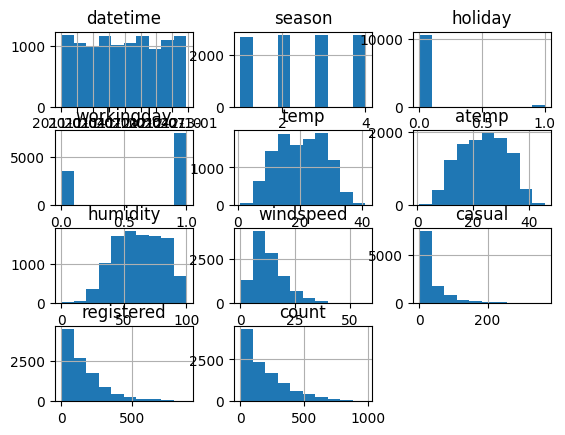

In [23]:
import matplotlib.pyplot as plt
df.hist()

In [24]:
df.corr()

C:\Users\ashis\AppData\Local\Temp\ipykernel_20764\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
temp,0.258689,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.163439,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


In [25]:
list(set(df.columns).difference(set(test.columns)))

['casual', 'registered', 'count']

In [26]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Creating a additional feature

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

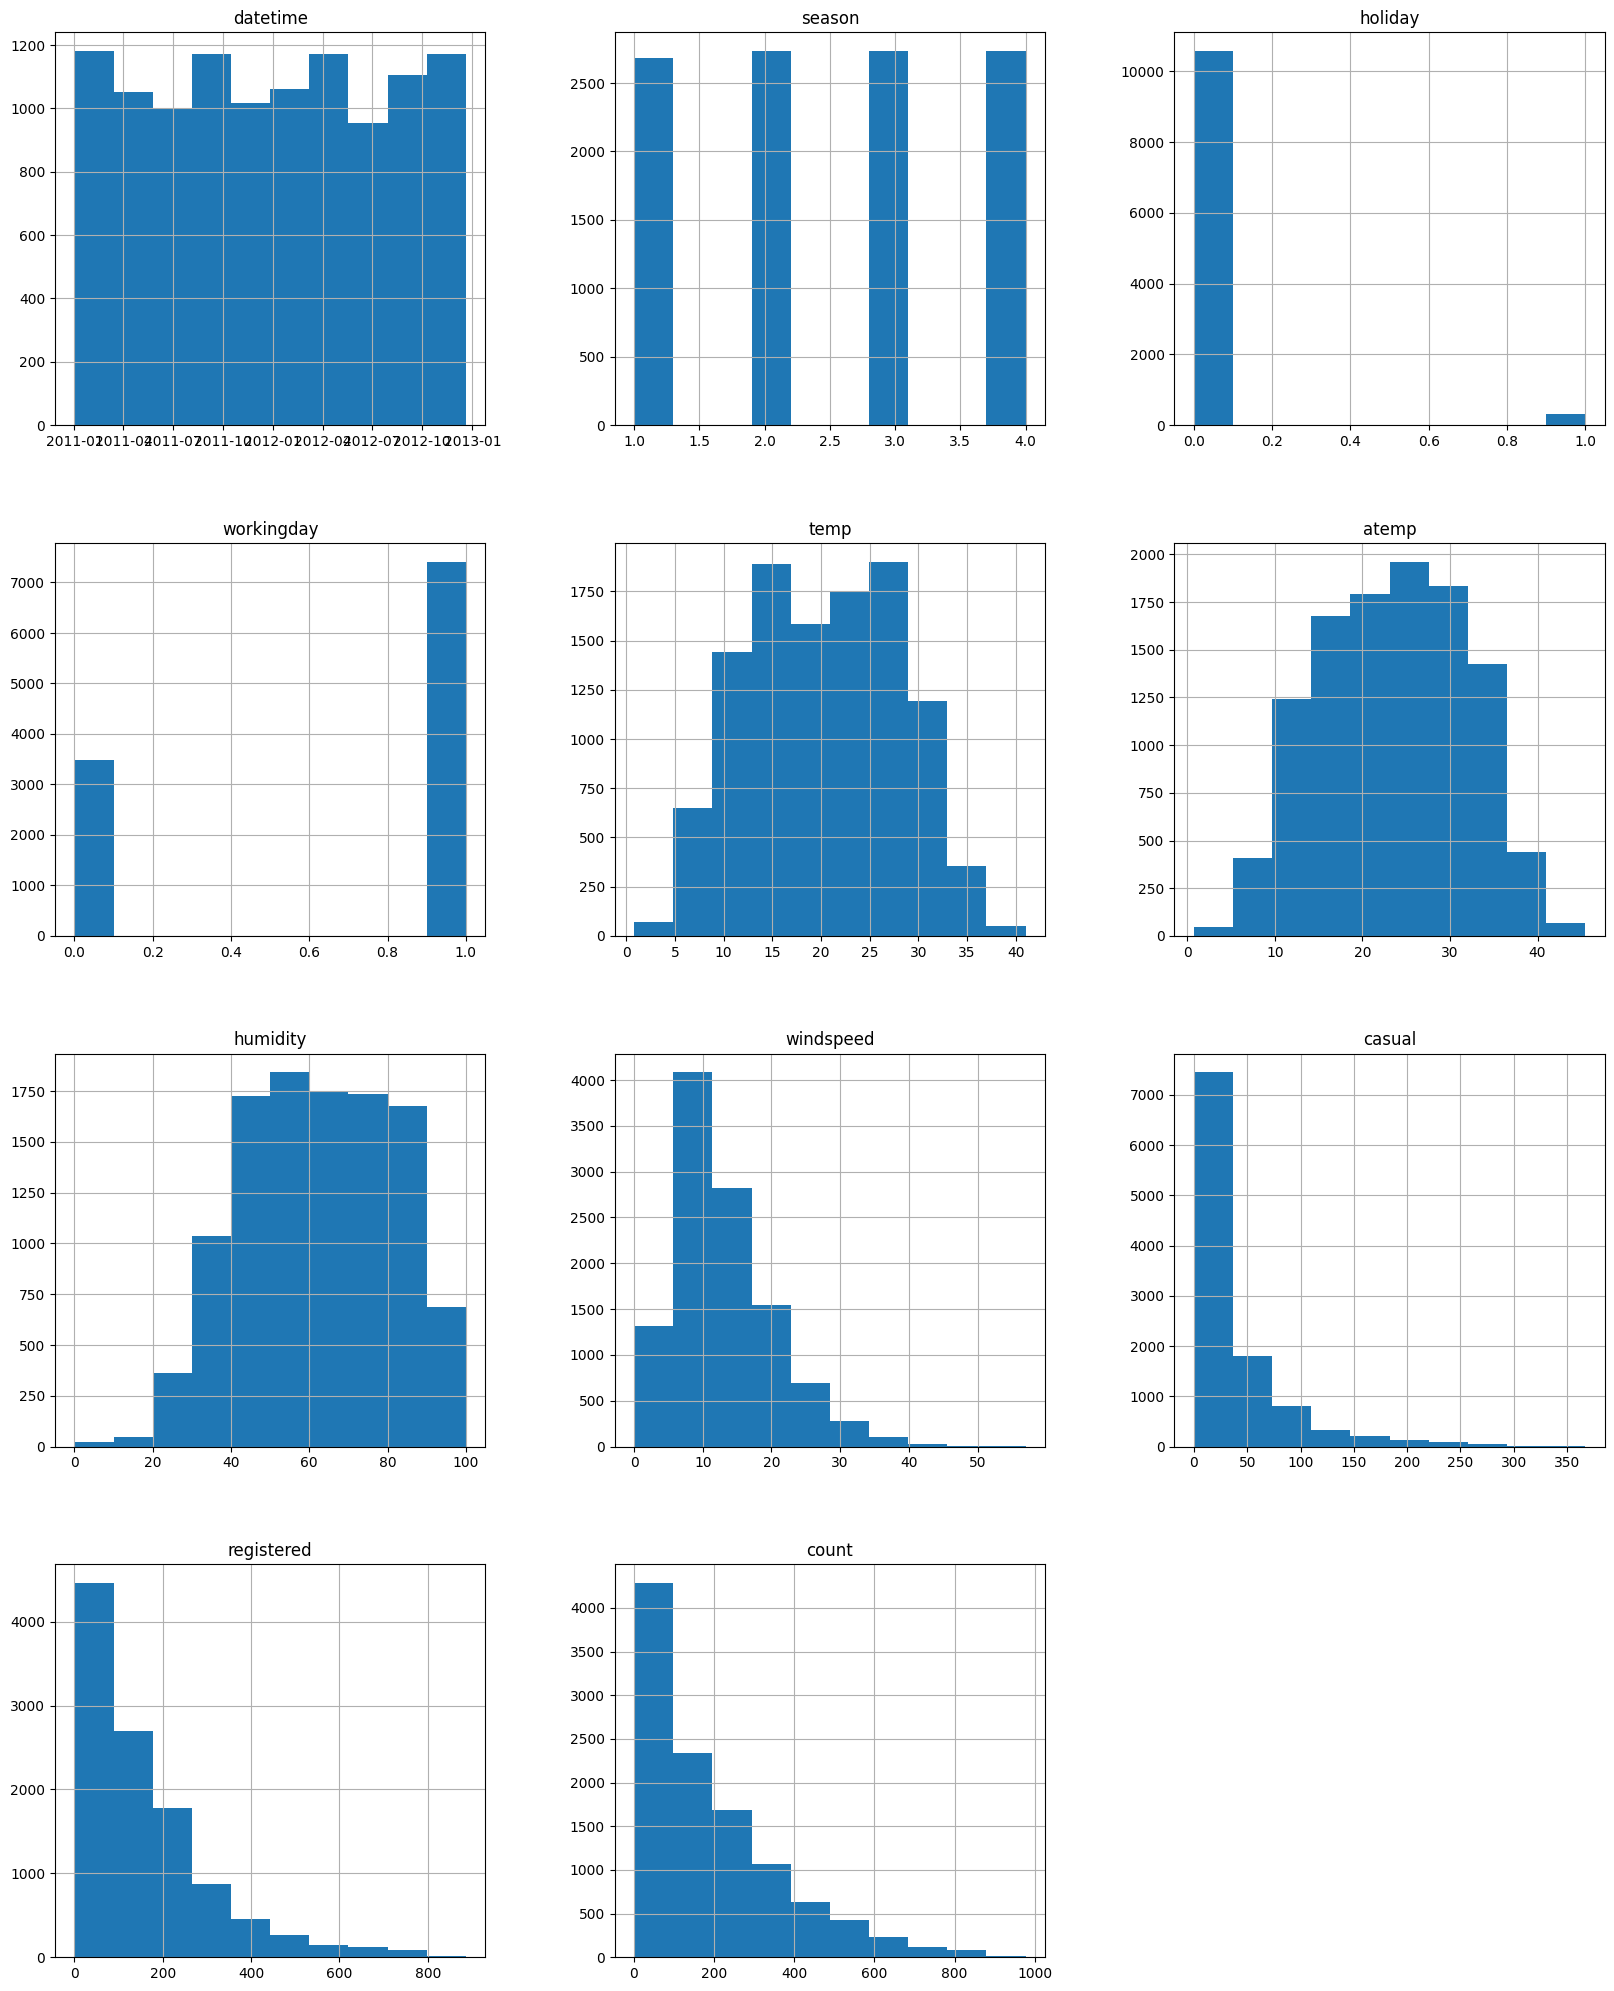

In [27]:
df.hist(figsize=(20,25))

In [28]:
df['datetime'].head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [29]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.dayofweek
df["hour"] = df["datetime"].dt.hour
df.drop(["datetime"], axis=1, inplace=True)

In [30]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [31]:
### also for the test data set
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)   # Drop 'datetime' feature
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


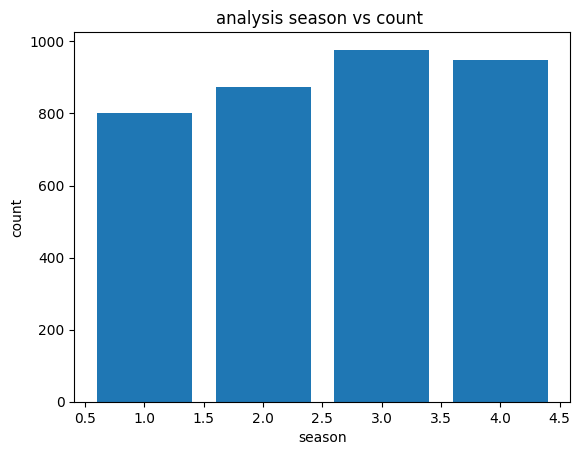

In [32]:
fig, ax = plt.subplots()
ax.bar(df["season"], df["count"])
ax.set_xlabel('season')
ax.set_ylabel('count')
ax.set_title('analysis season vs count ')
plt.show()

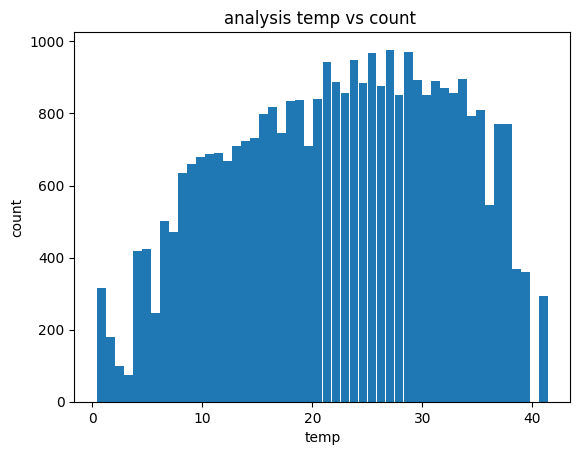

In [33]:
fig, ax = plt.subplots()
ax.bar(df["temp"], df["count"])
ax.set_xlabel('temp')
ax.set_ylabel('count')
ax.set_title('analysis temp vs count ')
plt.show()

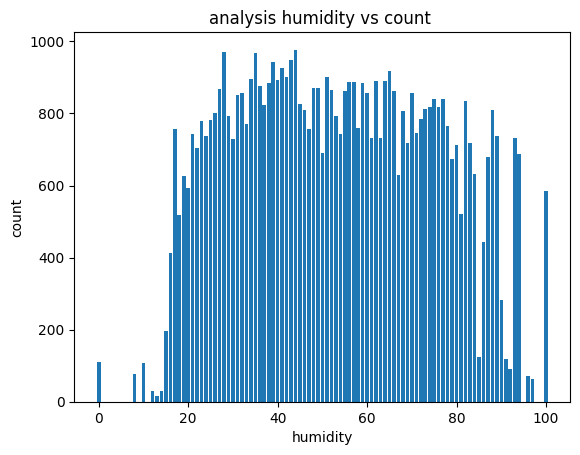

In [34]:
fig, ax = plt.subplots()
ax.bar(df["humidity"], df["count"])
ax.set_xlabel('humidity')
ax.set_ylabel('count')
ax.set_title('analysis humidity vs count ')
plt.show()

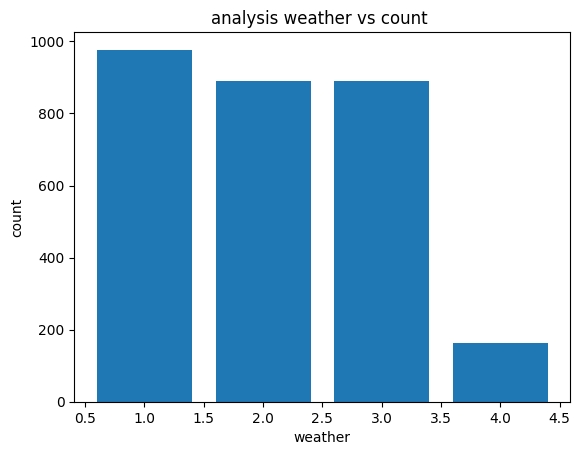

In [35]:
fig, ax = plt.subplots()
ax.bar(df["weather"], df["count"])
ax.set_xlabel('weather')
ax.set_ylabel('count')
ax.set_title('analysis weather vs count ')
plt.show()

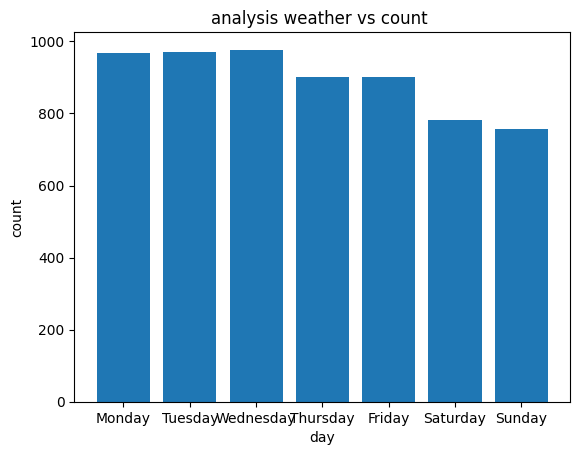

In [36]:
fig, ax = plt.subplots()
ax.bar(df["day"], df["count"])
ax.set_xlabel('day')
ax.set_ylabel('count')
ax.set_title('analysis weather vs count ')
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday", 
                                     "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()


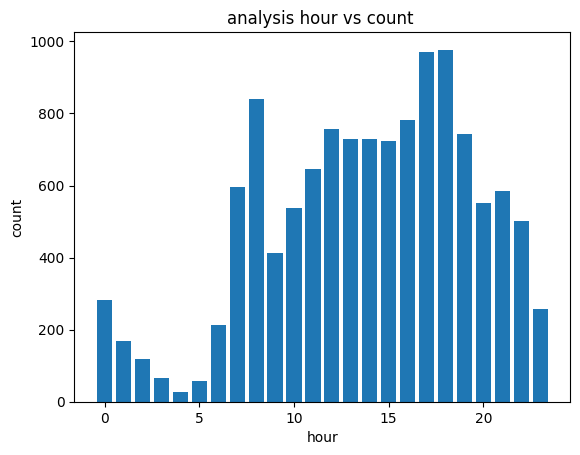

In [37]:
fig, ax = plt.subplots()
ax.bar(df["hour"], df["count"])
ax.set_xlabel('hour')
ax.set_ylabel('count')
ax.set_title('analysis hour vs count ')
# plt.xticks(ticks=range(0,24), labels=["Monday", "Tuesday", "Wednesday", 
#                                      "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

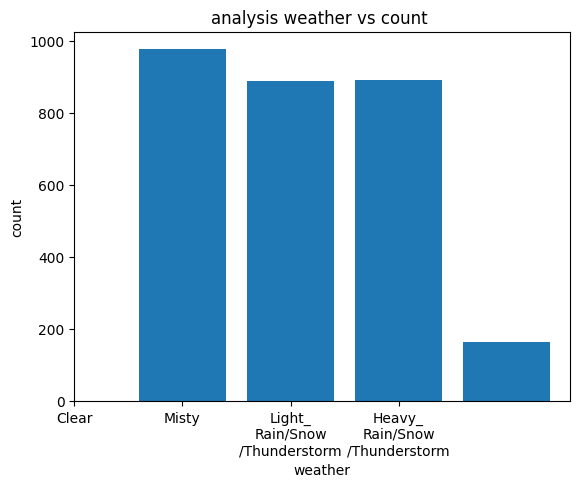

In [38]:
fig, ax = plt.subplots()
ax.bar(df["weather"], df["count"])
ax.set_xlabel('weather')
ax.set_ylabel('count')
ax.set_title('analysis weather vs count ')
plt.xticks(ticks=range(0,4), labels=["Clear","Misty", 
                                     "Light_\nRain/Snow\n/Thunderstorm", 
                                     "Heavy_\nRain/Snow\n/Thunderstorm"])
                                   
plt.show()



In [39]:
# Dropping highly correlated independent feature 'atemp' from train and test datasets
df.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_20764\2624509999.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_data[feature_numeric].corr()


<Figure size 1800x1800 with 0 Axes>

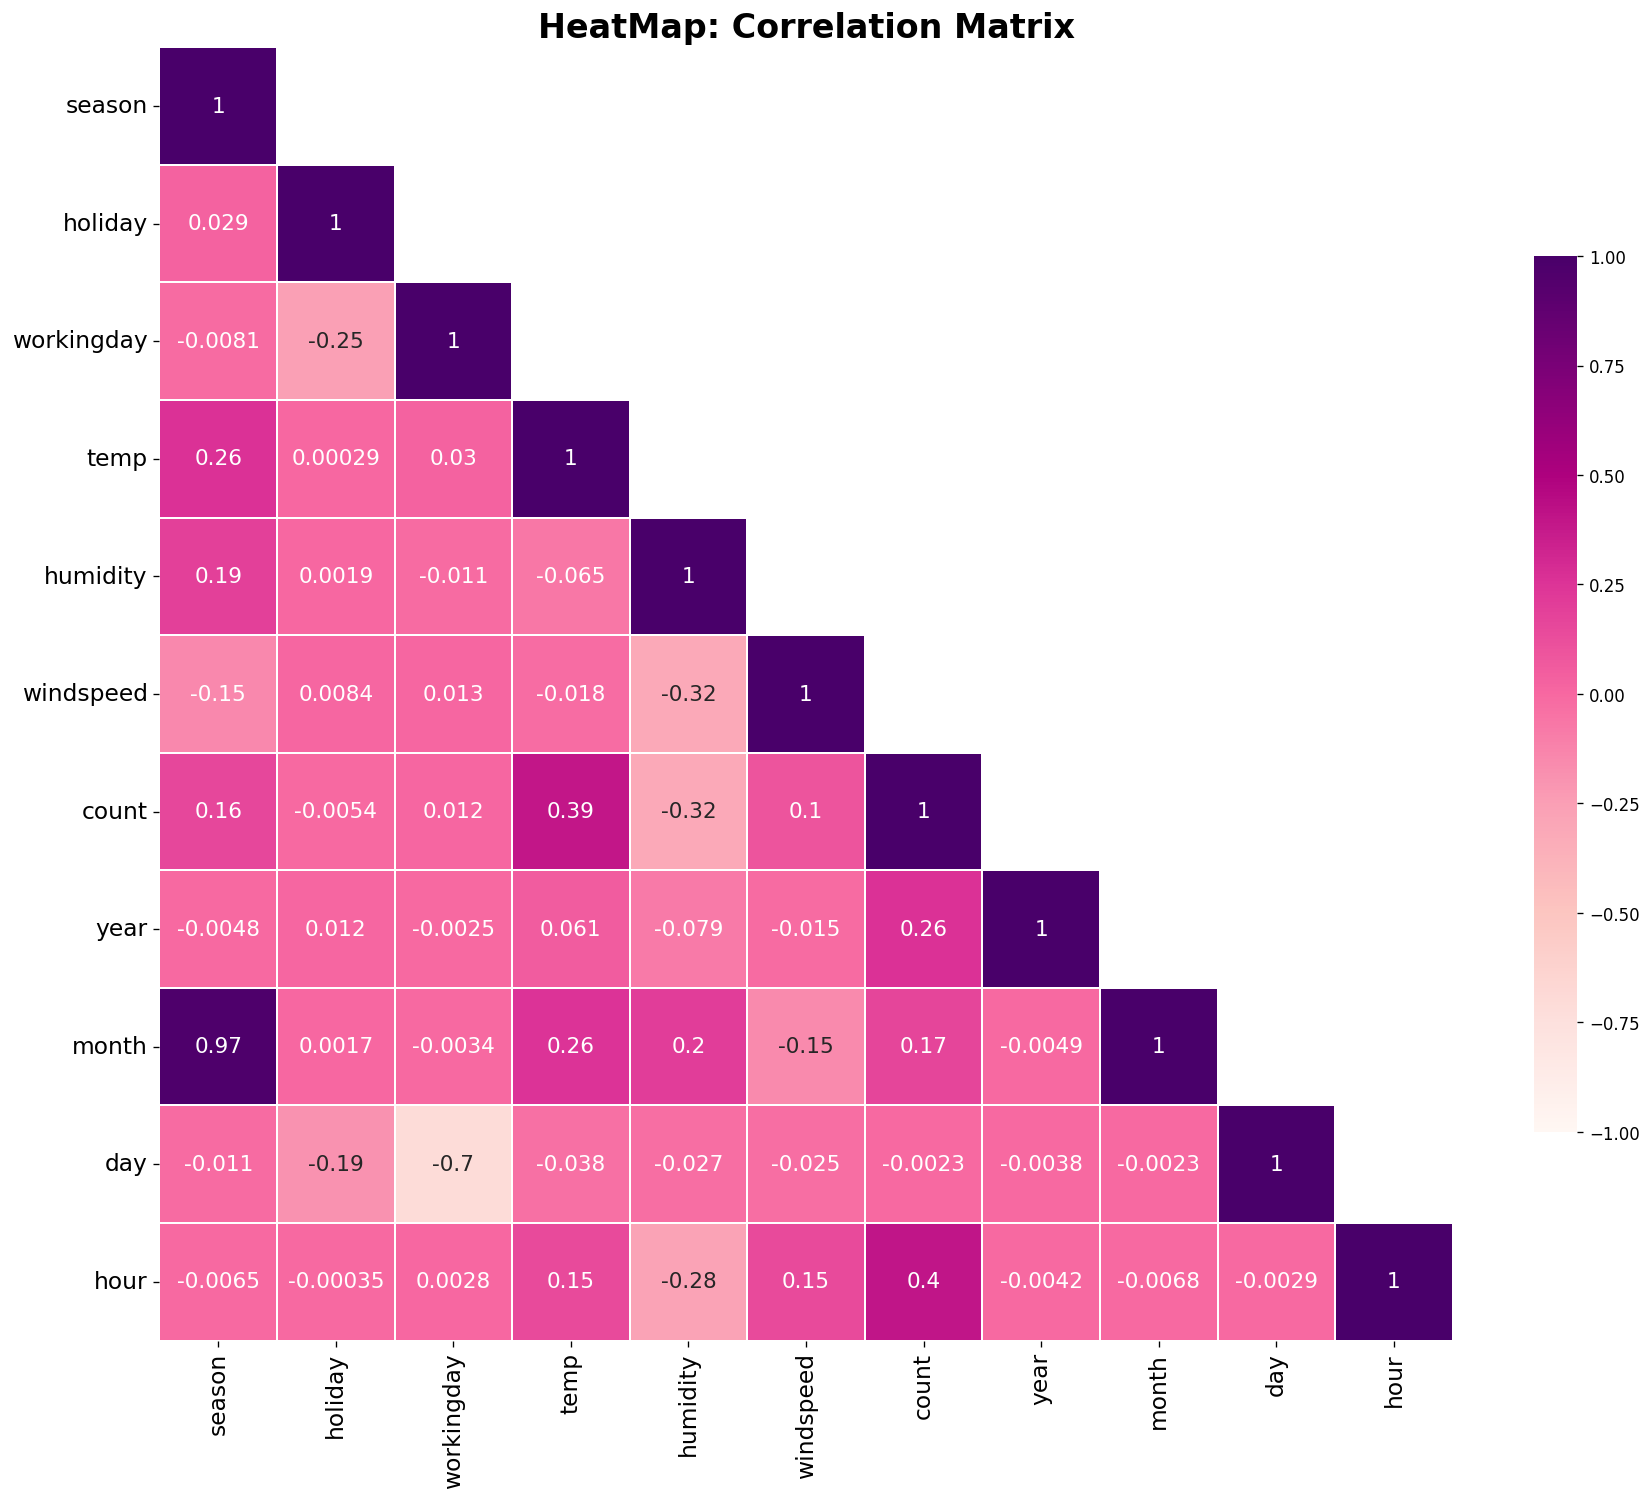

In [40]:
import seaborn as sns
import numpy as np
feature_numeric = [i for i in df.columns if i not in ['casual', 'registered']]
plt.figure(figsize = (15,15), dpi=120)
corr_data = df.copy()
corr_matrix = corr_data[feature_numeric].corr()

f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

### training modle using autogluan


In [41]:
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   
train_data = df                         
time_limit = 400                             
presets = "best_quality"                     

In [42]:
# Convert 'int' feature columns that are categorical in nature to 'category' type
df["season"] = df["season"].astype("category")
df["weather"] = df["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [43]:
##new feature
# Adding features - 'day_type' in df data
df["day_type"]=""
df.loc[(df.holiday==1),"day_type"] = "holiday"
df.loc[((df.holiday==0) & (df.workingday==1)), "day_type"] = "weekday"
df.loc[((df.holiday==0) & (df.workingday==0)), "day_type"] = "weekend"

# Adding features - 'day_type' in test data
test["day_type"]=""
test.loc[(test.holiday==1),"day_type"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "day_type"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "day_type"] = "weekend"

# Change the datatype to category
df["day_type"] = df["day_type"].astype("category")
test["day_type"] = test["day_type"].astype("category")

df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,1,0,0,1,9.84,81,0.0,3,13,16,2011,1,5,0,weekend
1,1,0,0,1,9.02,80,0.0,8,32,40,2011,1,5,1,weekend
2,1,0,0,1,9.02,80,0.0,5,27,32,2011,1,5,2,weekend
3,1,0,0,1,9.84,75,0.0,3,10,13,2011,1,5,3,weekend
4,1,0,0,1,9.84,75,0.0,0,1,1,2011,1,5,4,weekend


### predicting using tabular predictor

In [44]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,3.013963,11.541613
std,0.166599,0.466159,7.79159,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,2.004585,6.915838
min,0.000000,0.000000,0.82000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,1.000000,6.000000
50%,0.000000,1.000000,20.50000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,3.000000,12.000000
75%,0.000000,1.000000,26.24000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,5.000000,18.000000
max,1.000000,1.000000,41.00000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,6.000000,23.000000


In [45]:
                                                            
predictor_new_features = TabularPredictor(label=label, 
                                          problem_type= 'regression',
                                          eval_metric=eval_metric, 
                                          learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                                           train_data = train_data,
                                                                                           time_limit=time_limit,
                                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels\ag-20230601_205937\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 400s
AutoGluon will save models to "AutogluonModels\ag-20230601_205937\"
AutoGluon Version:  0.7.0
Python Version:     3.10.8
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2110.67 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
	

In [46]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -34.429100       9.889616  329.566936                0.000000           0.250639            3       True         16
1      WeightedEnsemble_L2  -34.630700       7.164929  194.616396                0.001021           0.374646            2       True          9
2          CatBoost_BAG_L2  -34.675971       7.814304  302.159709                0.067006          80.097797            2       True         13
3     ExtraTreesMSE_BAG_L2  -34.774665       8.322092  224.621009                0.574794           2.559097            2       True         14
4          LightGBM_BAG_L2  -35.006473       7.861293  224.327391                0.113995           2.265479            2       True         11
5   RandomForestMSE_BAG_L2  -35.379295       8.227464  229.987814         

c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.22656571102635,
  'KNeighborsDist_BAG_L1': -109.8130734346695

In [47]:
winner_new_features_df = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
winner_new_features_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-34.429100,9.889616,329.566936,0.000000,0.250639,3,True,16
1,WeightedEnsemble_L2,-34.630700,7.164929,194.616396,0.001021,0.374646,2,True,9
2,CatBoost_BAG_L2,-34.675971,7.814304,302.159709,0.067006,80.097797,2,True,13
3,ExtraTreesMSE_BAG_L2,-34.774665,8.322092,224.621009,0.574794,2.559097,2,True,14
4,LightGBM_BAG_L2,-35.006473,7.861293,224.327391,0.113995,2.265479,2,True,11
5,RandomForestMSE_BAG_L2,-35.379295,8.227464,229.987814,0.480166,7.925902,2,True,12
6,LightGBMXT_BAG_L2,-35.468647,8.168655,226.168523,0.421357,4.106610,2,True,10
7,NeuralNetFastAI_BAG_L2,-35.549238,8.232297,232.361413,0.485000,10.299500,2,True,15
8,LightGBM_BAG_L1,-35.780355,5.718782,9.678850,5.718782,9.678850,1,True,4
9,CatBoost_BAG_L1,-36.504198,0.131760,180.676499,0.131760,180.676499,1,True,6


In [48]:
# creating predicton from test data set
predictions = predictor_new_features.predict(test)
predictions.head()

0    11.912188
1     5.887506
2     4.119678
3     3.588336
4     3.500260
Name: count, dtype: float32

In [49]:
predictions.describe()

count    6493.000000
mean      191.065094
std       173.882523
min         1.591956
25%        47.071217
50%       150.189209
75%       284.267303
max       895.751770
Name: count, dtype: float64



### calculating negative values 

In [50]:
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [51]:
# Set them to zero 
predictions[predictions<0] = 0    # (In case, if negative values exist in the predictions, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [52]:
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [53]:
### prediction submission dataframe
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [54]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|▍         | 8.00k/194k [00:00<00:03, 51.4kB/s]
100%|██████████| 194k/194k [00:03<00:00, 51.0kB/s] 


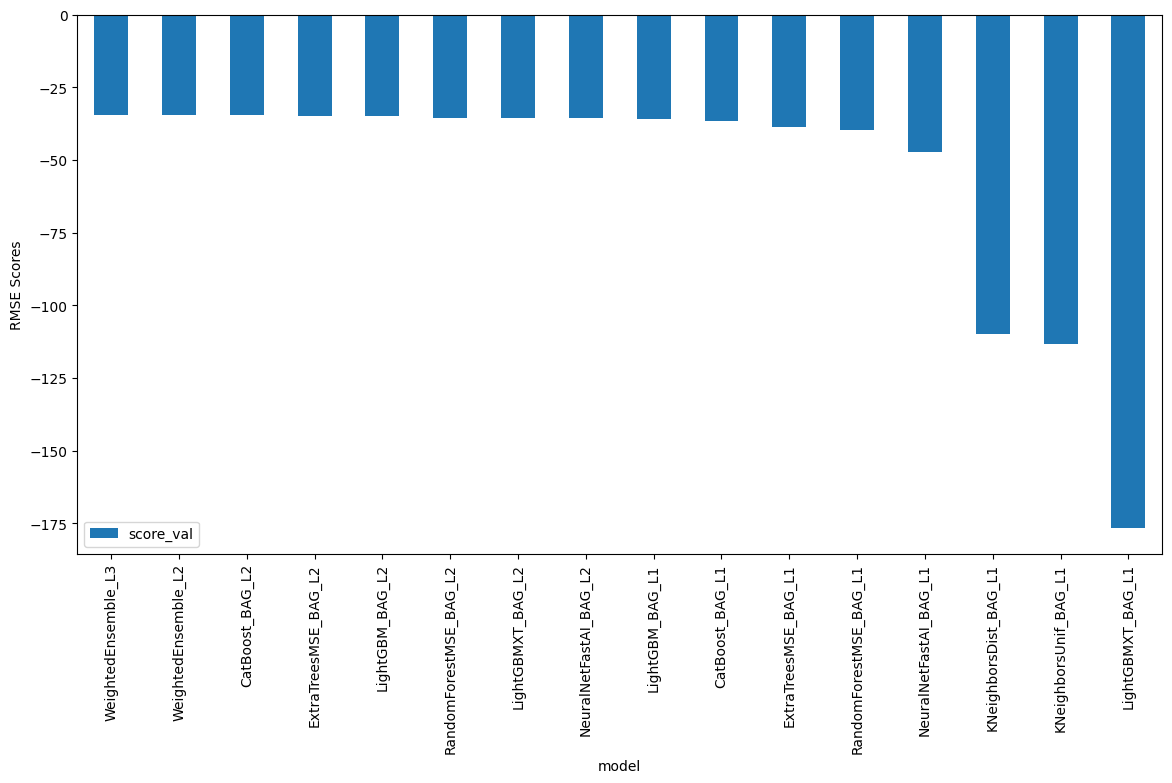

In [55]:
import matplotlib.pyplot as plt
winner_new_features_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

In [56]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|▍         | 8.00k/194k [00:00<00:03, 58.7kB/s]
100%|██████████| 194k/194k [00:04<00:00, 46.6kB/s] 


In [57]:
!kaggle competitions submissions -c bike-sharing-demand | more +1 | more +2

submission.csv           2023-06-01 21:06:41  first raw submission                 pending                              
submission.csv           2023-06-01 20:38:29  first raw submission                 error                                
submission.csv           2023-06-01 20:30:55  first raw submission                 error                                
submission_new_hpo1.csv  2023-06-01 20:26:35  new features with hyperparameters 1  complete  0.52780      0.52780       
submission.csv           2023-06-01 20:17:05  first raw submission                 error                                




### hyperparameters optimizations

In [58]:
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = df                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment" 

In [59]:
import autogluon.core as ag
## From autogluon documentation: 

# Exclude ['NN_TORCH'] family of models
excluded_model_types = ['NN_TORCH']


# Considering GBM, XT and XGB model types (as these along with WeightedEnsembles have shown good results)
# For GBM
gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}

# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'XT': xt_options,
                   'XGB': xgb_options
                  }  

num_trials = 20          
search_strategy = 'auto'  
scheduler = 'local'      

hyperparameter_tune_kwargs = { 
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }

hyperparametersprediction = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=df, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         excluded_model_types=excluded_model_types,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels\ag-20230601_210651\"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230601_210651\"
AutoGluon Version:  0.7.0
Python Version:     3.10.8
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2817.7 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtype

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT\T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	1.0s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBMXT\T2 ...
	-43.8633	 = Validation score   (-root_mean_squared_error)
	1.42s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT\T3 ...
	-88.1544	 = Validation score   (-root_mean_squared_error)
	0.83s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBMXT\T4 ...
	-50.4195	 = Validation score   (-root_mean_squared_error)
	1.67s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT\T5 ...
	-90.0782	 = Validation score   (-root_mean_squared_error)
	0.69s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBMXT\T6 ...
	-58.3299	 = Validation score   (-root_mean_squared_error)
	1.25s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT\T7 ...
	-40.3716	 = Validation score   (-root_mean_squared_error)
	1.76s	 = Traini

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924
[1000]	valid_set's rmse: 38.5145
[2000]	valid_set's rmse: 38.3808
[1000]	valid_set's rmse: 40.8581
[2000]	valid_set's rmse: 39.9082
[3000]	valid_set's rmse: 39.509
[4000]	valid_set's rmse: 39.2621
[5000]	valid_set's rmse: 39.0913
[6000]	valid_set's rmse: 39.0335
[7000]	valid_set's rmse: 39.035
[8000]	valid_set's rmse: 39.07
[1000]	valid_set's rmse: 43.5792
[2000]	valid_set's rmse: 41.0624
[3000]	valid_set

	Stopping HPO to satisfy time limit...
Fitted model: LightGBM\T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	2.65s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBM\T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.69s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	2.5s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBM\T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	11.21s	 = Training   runtime
	0.62s	 = Validation runtime
Fitted model: LightGBM\T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	1.8s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM\T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	3.68s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM\T7 ...
	-38.6204	 = Validation score   (-root_mean_squared_

  0%|          | 0/20 [00:00<?, ?it/s]

c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppDa

In [60]:
hyperparametersprediction.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.267490       1.907514  31.848729                0.000000           0.277140            2       True          7
1         LightGBM\T16 -37.844296       0.694681  12.656088                0.694681          12.656088            1       True          3
2         LightGBM\T13 -38.369670       0.193113   5.284721                0.193113           5.284721            1       True          2
3         LightGBM\T12 -38.431862       0.613990  10.289372                0.613990          10.289372            1       True          1
4          XGBoost\T19 -38.740239       0.014009   0.771221                0.014009           0.771221            1       True          6
5           XGBoost\T8 -39.384803       0.022014   1.499108                0.022014           1.499108        

c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM\\T12': 'LGBModel',
  'LightGBM\\T13': 'LGBModel',
  'LightGBM\\T16': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost\\T8': 'XGBoostModel',
  'XGBoost\\T19': 'XGBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM\\T12': -38.431861570431245,
  'LightGBM\\T13': -38.3696701247306,
  'LightGBM\\T16': -37.8442961045261,
  'ExtraTreesMSE': -39.58401115817354,
  'XGBoost\\T8': -39.38480317646934,
  'XGBoost\\T19': -38.7402388682388,
  'WeightedEnsemble_L2': -37.267490118074676},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM\\T12': 'd:\\bikesahringprediction\\AutogluonModels\\ag-20230601_210651\\models\\LightGBM\\T12\\',
  'LightGBM\\T13': 'd:\\bikesahringprediction\\AutogluonModels\\ag-20230601_210651\\models\\LightGBM\\T13\\',
  'LightGBM\\T16': 'd:\\bikesahringprediction\\AutogluonModels\\ag-20230601_210651\\models\\LightGBM\\T16\\',
  'ExtraTreesMSE': 'AutogluonModels\\ag-20230601_210651\\models\

In [61]:
# Leaderboard dataframe
leaderboard_new_hyperparparameter = pd.DataFrame(hyperparametersprediction.leaderboard(silent=True))
leaderboard_new_hyperparparameter

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.267490,1.907514,31.848729,0.000000,0.277140,2,True,7
1,LightGBM\T16,-37.844296,0.694681,12.656088,0.694681,12.656088,1,True,3
2,LightGBM\T13,-38.369670,0.193113,5.284721,0.193113,5.284721,1,True,2
3,LightGBM\T12,-38.431862,0.613990,10.289372,0.613990,10.289372,1,True,1
4,XGBoost\T19,-38.740239,0.014009,0.771221,0.014009,0.771221,1,True,6
5,XGBoost\T8,-39.384803,0.022014,1.499108,0.022014,1.499108,1,True,5
6,ExtraTreesMSE,-39.584011,0.369707,1.071079,0.369707,1.071079,1,True,4


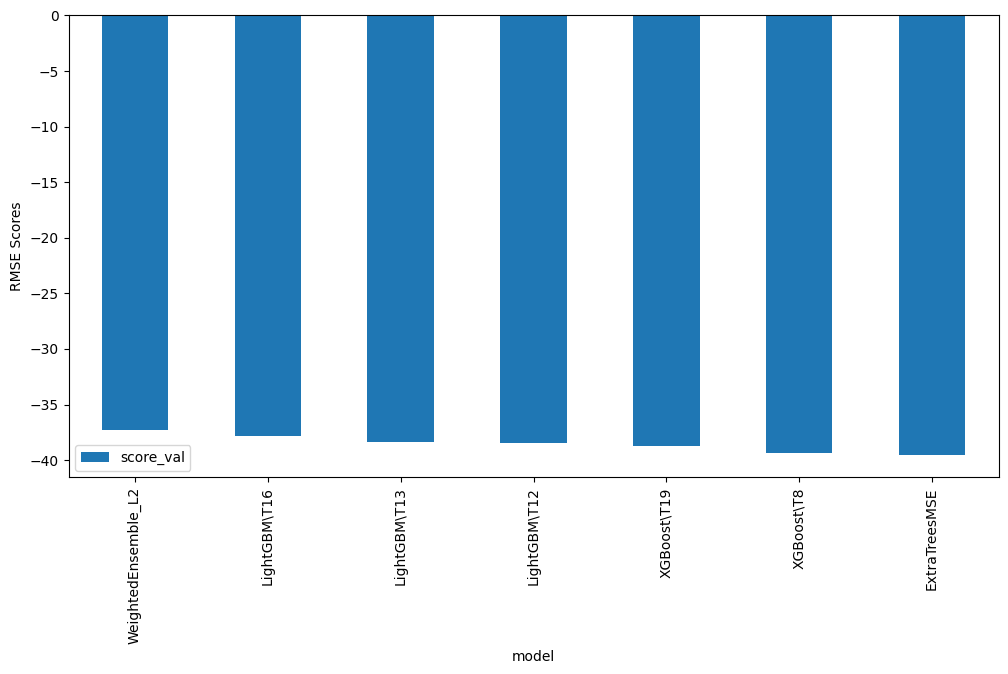

In [62]:
import matplotlib.pyplot as plt
leaderboard_new_hyperparparameter.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

### creating prediction from new hyper parameter set


In [63]:
predictions_new_hpo1 = hyperparametersprediction.predict(test)
predictions_new_hpo1.head()

c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


0    17.158722
1     2.856476
2     1.108927
3     1.995836
4     2.034233
Name: count, dtype: float32

In [64]:
predictions_new_hpo1.describe()

count    6493.000000
mean      191.177002
std       172.382889
min       -11.469972
25%        48.937874
50%       151.675049
75%       284.135803
max       935.037964
Name: count, dtype: float64

### Negative values count 

In [65]:
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo1.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6429
Total negative prediction values : 64


### setting negative values to zero 

In [66]:
predictions_new_hpo1[predictions_new_hpo1<0] = 0    # (In case, if negative values exist in the predictions_new_hpo1, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo1.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No.of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")


No.of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [67]:
#Set predictions to submission dataframe, save, and submit

# Same thing as train and test dataset
submission_new_hpo1 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo1.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [68]:
# Same submitting predictions
submission_new_hpo1["count"] = predictions_new_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

In [69]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters 1"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|▍         | 8.00k/194k [00:00<00:04, 40.6kB/s]
 95%|█████████▍| 184k/194k [00:00<00:00, 764kB/s]  
100%|██████████| 194k/194k [00:04<00:00, 49.0kB/s]


In [70]:
!kaggle competitions submissions -c bike-sharing-demand | more +1 | more +1


submission_new_hpo1.csv  2023-06-01 21:10:17  new features with hyperparameters 1  complete  0.53395      0.53395       
submission.csv           2023-06-01 21:06:48  first raw submission                 complete  0.48032      0.48032       
submission.csv           2023-06-01 21:06:41  first raw submission                 complete  0.48032      0.48032       
submission.csv           2023-06-01 20:38:29  first raw submission                 error                                
submission.csv           2023-06-01 20:30:55  first raw submission                 error                                
submission_new_hpo1.csv  2023-06-01 20:26:35  new features with hyperparameters 1  complete  0.52780      0.52780       
submission.csv           2023-06-01 20:17:05  first raw submission                 error                                




#### extra hyperparameters 

In [76]:
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = df                          # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 600 seconds
presets = "optimize_for_deployment"

In [77]:
import autogluon.core as ag
## From autogluon documentation

# Exclude ['NN_TORCH'] family of models
excluded_model_types = ['NN_TORCH']


# Considering GBM, XT, XGB, KNN and RF model types (as these along with WeightedEnsembles have shown good results in the past)
# For GBM
gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=800, default=100),
                'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']
# XT Models
xt_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# XGB Models
xgb_options = [{'objective': 'reg:squarederror', # 'reg:linear' is deprecated
                'eval_metric': 'rmse', 
                'max_depth':ag.space.Int(lower=5, upper=8, default=6), 
                'n_estimators': ag.space.Int(lower=100, upper=500, default=100), 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]
# Random Forest Models
rf_options = {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}}
# KNN
knn_options = [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Uniform'}}, 
               {'weights': 'distance', 'ag_args': {'name_suffix': 'Distance'}}]  # default
hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'KNN': knn_options,
                   'XT': xt_options,
                   'XGB': xgb_options,
                   'RF': rf_options
                  }  


num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
                            'num_trials': num_trials,
                            'scheduler' : scheduler,
                            'searcher': search_strategy,
                        }


predictor_new_hpo2 = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=df, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         excluded_model_types=excluded_model_types,
                                                                         refit_full='best')

No path specified. Models will be saved in: "AutogluonModels\ag-20230601_212257\"
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20230601_212257\"
AutoGluon Version:  0.7.0
Python Version:     3.10.8
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1589.83 MB
	Train Data (Original)  Memory Usage: 0.82 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 3 features to boolean dtyp

  0%|          | 0/20 [00:00<?, ?it/s]

Fitted model: LightGBMXT\T1 ...
	-71.9711	 = Validation score   (-root_mean_squared_error)
	0.71s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBMXT\T2 ...
	-43.8633	 = Validation score   (-root_mean_squared_error)
	1.37s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT\T3 ...
	-88.1544	 = Validation score   (-root_mean_squared_error)
	0.9s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBMXT\T4 ...
	-50.4195	 = Validation score   (-root_mean_squared_error)
	2.14s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBMXT\T5 ...
	-90.0782	 = Validation score   (-root_mean_squared_error)
	0.85s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBMXT\T6 ...
	-58.3299	 = Validation score   (-root_mean_squared_error)
	1.44s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT\T7 ...
	-40.3716	 = Validation score   (-root_mean_squared_error)
	2.09s	 = Traini

  0%|          | 0/20 [00:00<?, ?it/s]

[1000]	valid_set's rmse: 38.8412
[1000]	valid_set's rmse: 39.722
[1000]	valid_set's rmse: 39.5199
[2000]	valid_set's rmse: 38.3691
[3000]	valid_set's rmse: 38.1532
[4000]	valid_set's rmse: 38.1416
[5000]	valid_set's rmse: 38.1845
[1000]	valid_set's rmse: 39.0485
[1000]	valid_set's rmse: 39.3696
[2000]	valid_set's rmse: 38.677
[3000]	valid_set's rmse: 38.6376
[1000]	valid_set's rmse: 38.5283
[2000]	valid_set's rmse: 38.2386
[1000]	valid_set's rmse: 39.1305
[2000]	valid_set's rmse: 38.5694
[3000]	valid_set's rmse: 38.5402
[4000]	valid_set's rmse: 38.4337
[5000]	valid_set's rmse: 38.4924


	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's rmse: 180.491
Fitted model: LightGBM\T1 ...
	-38.7749	 = Validation score   (-root_mean_squared_error)
	2.63s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBM\T2 ...
	-39.278	 = Validation score   (-root_mean_squared_error)
	1.67s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM\T3 ...
	-39.6569	 = Validation score   (-root_mean_squared_error)
	2.83s	 = Training   runtime
	0.05s	 = Validation runtime
Fitted model: LightGBM\T4 ...
	-38.124	 = Validation score   (-root_mean_squared_error)
	12.46s	 = Training   runtime
	0.95s	 = Validation runtime
Fitted model: LightGBM\T5 ...
	-39.5392	 = Validation score   (-root_mean_squared_error)
	2.03s	 = Training   runtime
	0.03s	 = Validation runtime
Fitted model: LightGBM\T6 ...
	-39.0408	 = Validation score   (-root_mean_squared_error)
	3.82s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightG

  0%|          | 0/20 [00:00<?, ?it/s]

c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppDa

In [78]:
### Graph for the reports
predictor_new_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.141616       2.195904  32.616871                0.000000           0.343926            2       True          8
1          LightGBM\T4 -38.124006       0.946129  12.458028                0.946129          12.458028            1       True          1
2         LightGBM\T12 -38.431862       0.646969  11.180322                0.646969          11.180322            1       True          3
3        LightGBMLarge -38.516436       0.049999   3.737612                0.049999           3.737612            1       True          7
4         LightGBM\T10 -38.559673       0.010002   1.379374                0.010002           1.379374            1       True          2
5          XGBoost\T19 -38.740239       0.016000   0.712586                0.016000           0.712586        

c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM\\T4': 'LGBModel',
  'LightGBM\\T10': 'LGBModel',
  'LightGBM\\T12': 'LGBModel',
  'ExtraTreesMSE': 'XTModel',
  'XGBoost\\T8': 'XGBoostModel',
  'XGBoost\\T19': 'XGBoostModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM\\T4': -38.12400606130618,
  'LightGBM\\T10': -38.55967268294494,
  'LightGBM\\T12': -38.431861570431245,
  'ExtraTreesMSE': -39.58401115817354,
  'XGBoost\\T8': -39.38480317646934,
  'XGBoost\\T19': -38.7402388682388,
  'LightGBMLarge': -38.51643622165731,
  'WeightedEnsemble_L2': -37.14161578501898},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM\\T4': 'd:\\bikesahringprediction\\AutogluonModels\\ag-20230601_212257\\models\\LightGBM\\T4\\',
  'LightGBM\\T10': 'd:\\bikesahringprediction\\AutogluonModels\\ag-20230601_212257\\models\\LightGBM\\T10\\',
  'LightGBM\\T12': 'd:\\bikesahringprediction\\AutogluonModels\\ag-20230601_212257\\models\\LightGBM\\T12\\

In [79]:
leaderboard_new_hpo2_df = pd.DataFrame(predictor_new_hpo2.leaderboard(silent=True))
leaderboard_new_hpo2_df

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.141616,2.195904,32.616871,0.000000,0.343926,2,True,8
1,LightGBM\T4,-38.124006,0.946129,12.458028,0.946129,12.458028,1,True,1
2,LightGBM\T12,-38.431862,0.646969,11.180322,0.646969,11.180322,1,True,3
3,LightGBMLarge,-38.516436,0.049999,3.737612,0.049999,3.737612,1,True,7
4,LightGBM\T10,-38.559673,0.010002,1.379374,0.010002,1.379374,1,True,2
5,XGBoost\T19,-38.740239,0.016000,0.712586,0.016000,0.712586,1,True,6
6,XGBoost\T8,-39.384803,0.022520,1.695837,0.022520,1.695837,1,True,5
7,ExtraTreesMSE,-39.584011,0.504285,1.109188,0.504285,1.109188,1,True,4


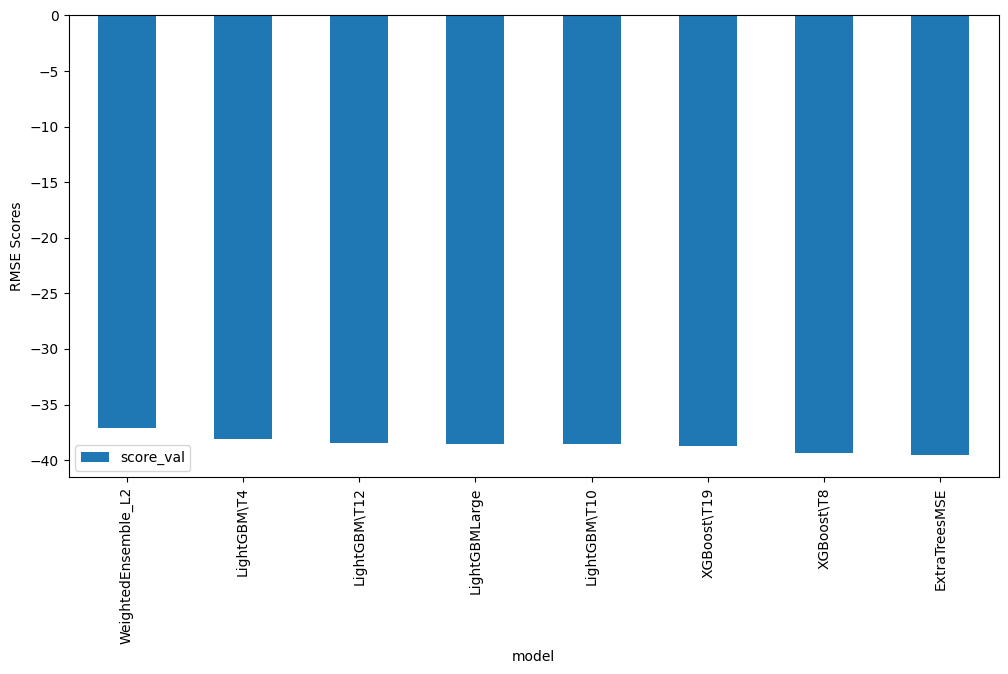

In [80]:
import matplotlib.pyplot as plt
leaderboard_new_hpo2_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

###making prediction from test data set

In [81]:
predictions_new_hpo2 = predictor_new_hpo2.predict(test)
predictions_new_hpo2.head()

c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
c:\Users\ashis\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


0    17.273113
1     3.899696
2     2.157523
3     1.608736
4     1.633213
Name: count, dtype: float32

In [82]:
predictions_new_hpo2.describe()

count    6493.000000
mean      191.223419
std       172.565857
min        -8.413492
25%        48.294991
50%       150.919464
75%       283.862061
max       939.476074
Name: count, dtype: float64

In [83]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_hpo2
negative_pred_count = predictions_new_hpo2.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_hpo2.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6432
Total negative prediction values : 61


In [84]:
# Remember to set all negative values to zero 
predictions_new_hpo2[predictions_new_hpo2<0] = 0    # (In case, if negative values exist in the predictions_new_hpo2, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo2.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [85]:
submission_new_hpo2 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo2.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [86]:
submission_new_hpo2["count"] = predictions_new_hpo2
submission_new_hpo2.to_csv("submission_new_hpo2.csv", index=False)

In [87]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo2.csv -m "new features with hyperparameters 2"


Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|▍         | 8.00k/194k [00:00<00:03, 51.5kB/s]
100%|██████████| 194k/194k [00:03<00:00, 61.3kB/s] 


In [90]:
!kaggle competitions submissions -c bike-sharing-demand | more +1 | more +1

submission_new_hpo2.csv  2023-06-01 21:27:55  new features with hyperparameters 2  complete  0.52891      0.52891       
submission_new_hpo1.csv  2023-06-01 21:10:17  new features with hyperparameters 1  complete  0.53395      0.53395       
submission.csv           2023-06-01 21:06:48  first raw submission                 complete  0.48032      0.48032       
submission.csv           2023-06-01 21:06:41  first raw submission                 complete  0.48032      0.48032       
submission.csv           2023-06-01 20:38:29  first raw submission                 error                                
submission.csv           2023-06-01 20:30:55  first raw submission                 error                                
submission_new_hpo1.csv  2023-06-01 20:26:35  new features with hyperparameters 1  complete  0.52780      0.52780       
submission.csv           2023-06-01 20:17:05  first raw submission                 error                                




FileNotFoundError: [Errno 2] No such file or directory: 'img/model_train_score.png'

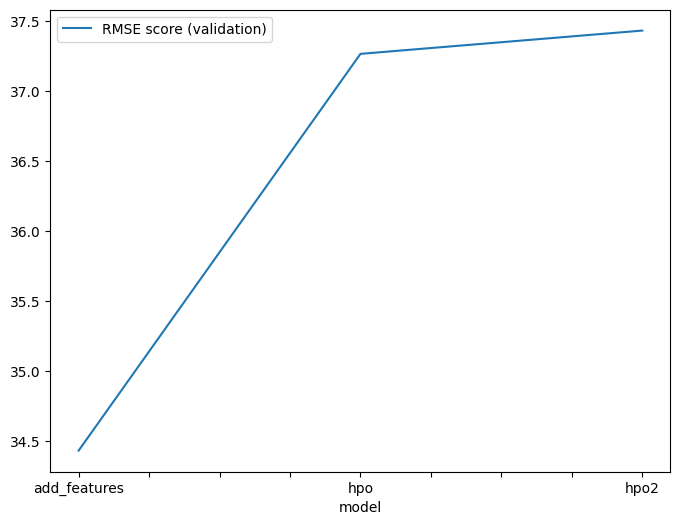

In [92]:
import pandas as pd 
import matplotlib.pyplot as plt
fig = pd.DataFrame(
        {
              "model": ["add_features", "hpo", "hpo2"], 
              "RMSE score (validation)": [34.4291, 37.267490 , 37.4340,]  # Note: Actual RMSE values are considered
          }
       ).plot(x="model", y="RMSE score (validation)", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

FileNotFoundError: [Errno 2] No such file or directory: 'img/model_test_score.png'

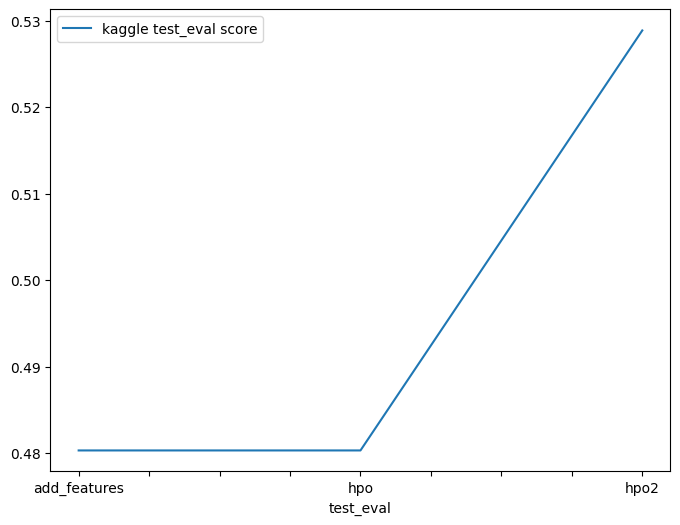

In [93]:
#Take the 3 kaggle scores (or more) and create a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["add_features", "hpo", "hpo2", ],  
        "kaggle test_eval score": [0.4803  , 0.4803 , 0.5289, ]
    }
).plot(x="test_eval", y="kaggle test_eval score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')

### Hyperparameter Table

In [101]:
pd.DataFrame({
    "model": [ "add_features", "hpo", "hpo2"],
    "hpo": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [0.4803  , 0.4803 , 0.5289,]
})

,model,hpo,hpo2,score
0,add_features,prescribed_values,presets: 'high quality' (auto_stack=True),0.4803
1,hpo,prescribed_values,presets: 'high quality' (auto_stack=True),0.4803
2,hpo2,"Tree-Based Models: (GBM, XT, XGB & RF)",presets: 'optimize_for_deployment,0.5289
